# Adult Income FTU Model Bias Analysis
mk4

### 1) Dependencies
### 2) Custom Functions
### 3) Import Data
### 4) Bias Analysis

## Import Dependencies

In [1]:
# !pip install researchpy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
import math
import os

In [4]:
from dataclasses import dataclass
from sklearn.metrics import confusion_matrix

In [5]:
warnings.filterwarnings('ignore')

%matplotlib inline

In [6]:
pd.options.display.max_columns = 250
pd.options.display.max_rows = 250

# Custom functions

#### Custom Save

In [7]:
def custom_save(name, data, kind=1):
    '''
    name : string
        designated filename
    data : data or pytorch model
        the data to save
    kind : int
        sentinel value - 1 if pytorch model, 0 otherwise
    
    custom_save stores the data passed into the function into a file with the provided name
    '''
    
    if kind == 1:
        ex = ".pth"
    else:
        ex = ".parquet"
    
    sentinel = True
    i = 1

    while sentinel:
        dirlist = os.listdir()

        if name not in dirlist:
            if kind == 1:
                torch.save(data, name)
            else:
                data.to_parquet(name)
            print(f"{name} has been saved.")                
            sentinel = False
        if name in dirlist:
            print(f"{name} already exists.", end=" ")
            temp, ext = name.split(ex)
            if "_v" in temp:
                temp, _ = temp.split("_v")
            name = f"{temp}_v{i}{ex}"
            i = i + 1
            print(f"Changing file name to: {name}")

#### Dataclass for confusion matrix results

In [8]:
@dataclass
class cmatrix:
    name: str
    TP: int
    FP: int
    TN: int
    FN: int    
    PPV: float
    TPR: float
    FDR: float
    FPR: float
    FOR: float
    FNR: float
    NPV: float
    TNR: float

#### Helper function to generate dataclass _cmatrix_

In [9]:
def gen_dataclass(actual, pred, name):
    [TN, FP, FN, TP] = confusion_matrix(actual, pred).ravel()
    

    PPV = TP / (TP + FP)  # positive predictive value
    FDR = FP / (TP + FP)  # false discovery rate
    
    TPR = TP / (TP + FN)  # true positive rate
    FNR = FN / (TP + FN)  # false negative rate
    
    TNR = TN / (TN + FP)  # true negative rate
    FPR = FP / (TN + FP)  # false positive rate

    FOR = FN / (TN + FN)  # false omission rate
    NPV = TN / (TN + FN)  # negative predictive value

    
    return cmatrix(name, TP, FP, TN, FN, PPV, TPR, FDR, FPR, FOR, FNR, NPV, TNR)

#### Extract bias metrics

In [10]:
def bias_metrics(df):
    '''
    - takes dataframe as input
    - returns dataclass whose components are statistical measures from a confusion matrix
    particular to relu, tanh, elu, and leaky relu dataframe series
    '''
    actual = df.target.values
    relu = df.pred_relu.values
    tanh = df.pred_tanh.values
    elu = df.pred_elu.values
    leaky = df.pred_leaky.values
    
    relu = gen_dataclass(actual, relu, "relu")
    tanh = gen_dataclass(actual, tanh, "tanh")
    elu = gen_dataclass(actual, elu, "elu")
    leaky = gen_dataclass(actual, leaky, "leaky")
    
    return relu, tanh, elu, leaky

# Import Data

In [11]:
data = pd.read_parquet("adult_results_mk5_FTU_v2.parquet")

source = "Adult Income_FTU"
suffix = "mk4"
name = f"{source}_stats_{suffix}.parquet"
tag = ["Ground", "Group A", "Group B"]

In [12]:
data.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ ?,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,native-country_ ?,native-country_ Cambodia,native-country_ Canada,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Holand-Netherlands,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,gender,target,pred_relu,pred_tanh,pred_elu,pred_leaky
0,25.0,226802.0,7.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0
1,38.0,89814.0,9.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0
2,28.0,336951.0,12.0,0.0,0.0,40.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,0,0,0,0
3,44.0,160323.0,10.0,7688.0,0.0,40.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0

In [13]:
features = list(data.columns[-5:])
features

['target', 'pred_relu', 'pred_tanh', 'pred_elu', 'pred_leaky']

#### Inspect Data

**Note:** The following confusion matrix should return a list of four (4) numbers, with zero (0) false negatives and false positives. Example: array([100, 0, 0, 10])

In [14]:
confusion_matrix(data.target, data.target).ravel()

array([12435,     0,     0,  3846])

In [94]:
l = 47
title = f" * {source} Confusion Matrix, Tabular *"
t = len(title)
offset = l//2 - t//2

print(" "*offset + title)
print("-"*l)
print("Name\t    Total   TP     FP   TN     FN")
for f in features:
    total = data[f].shape[0]
    try:
        [tn, fp, fn, tp] = confusion_matrix(data.target, data[f]).ravel()
    except Exception:
        pass
    print(f"{f:10s}: {total:5.0f}  {tp:5.0f} {fp:5.0f} {tn:6.0f} {fn:5.0f}")

 * Adult Income_FTU Confusion Matrix, Tabular *
-----------------------------------------------
Name	    Total   TP     FP   TN     FN
target    : 16281   3846     0  12435     0
pred_relu : 16281    142    22  12413  3704
pred_tanh : 16281   2309  1015  11420  1537
pred_elu  : 16281   2271   959  11476  1575
pred_leaky: 16281    136    15  12420  3710


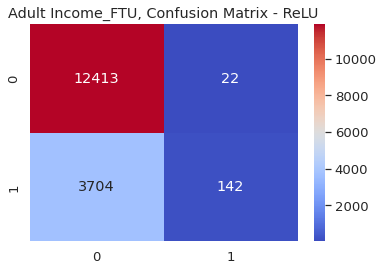

In [16]:
cm_relu = confusion_matrix(data.target, data.pred_relu)
sns.set(font_scale=1.2)
sns.heatmap(cm_relu, annot=True, cmap="coolwarm", robust=True, fmt='g')
plt.title(f"{source}, Confusion Matrix - ReLU")
plt.show()

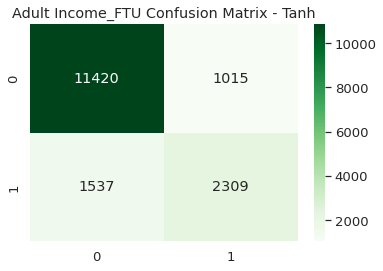

In [95]:
cm_tanh = confusion_matrix(data.target, data.pred_tanh)
sns.set(font_scale=1.2)
sns.heatmap(cm_tanh, annot=True, cmap="Greens", robust=True, fmt='g')
plt.title(f"{source} Confusion Matrix - Tanh")
plt.savefig("adult - FTU cm tanh.png")
plt.show()

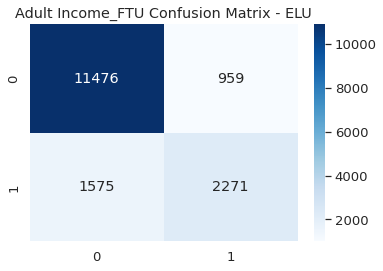

In [96]:
cm_elu = confusion_matrix(data.target, data.pred_elu)
sns.set(font_scale=1.2)
sns.heatmap(cm_elu, annot=True, cmap="Blues", robust=True, fmt='g')
plt.title(f"{source} Confusion Matrix - ELU")
plt.savefig("adult - FTU cm elu.png")
plt.show()

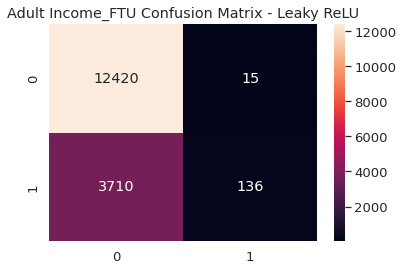

In [97]:
cm_leaky = confusion_matrix(data.target, data.pred_leaky)
sns.set(font_scale=1.2)
sns.heatmap(cm_leaky, annot=True, fmt='g')
plt.title(f"{source} Confusion Matrix - Leaky ReLU")
plt.savefig("adult - FTU cm leaky.png")
plt.show()

## Separate by protected feature

In [20]:
# group A : protected attribute
# group B : other
GroupA = data[data["gender"] == 1]
GroupB = data[data["gender"] == 0]
attribute = ["female", "male"]
protected_features = ["gender"]

In [21]:
Aset = GroupA.iloc[:,-5:]
Bset = GroupB.iloc[:,-5:]
base = data.iloc[:,-5:]

In [22]:
GroupA.shape

(5421, 112)

In [23]:
GroupB.shape

(10860, 112)

In [24]:
data.shape

(16281, 112)

##### Control stats, baseline

In [25]:
Cr, Ct, Ce, Cl = bias_metrics(data)

In [26]:
Ct.TPR

0.6003640145605824

##### Stats for Group A and Group B dataframes

In [27]:
Ar, At, Ae, Al = bias_metrics(GroupA)
Br, Bt, Be, Bl = bias_metrics(GroupB)

In [28]:
At.TPR

0.511864406779661

# Bias Testing

#### Set α (alpha)

In [29]:
α = 0.01

#### Predictive parity

Compares precision (or positive predictive value, PPV) between group with protected attribute and without protected attribute. In this instance female group with male group

In [30]:
ppCA = [
    math.isclose(Cr.PPV, Ar.PPV, rel_tol=α),
    math.isclose(Ct.PPV, At.PPV, rel_tol=α),
    math.isclose(Ce.PPV, Ae.PPV, rel_tol=α),
    math.isclose(Cl.PPV, Al.PPV, rel_tol=α)
]

In [31]:
ppCB = [
    math.isclose(Cr.PPV, Br.PPV, rel_tol=α),
    math.isclose(Ct.PPV, Bt.PPV, rel_tol=α),
    math.isclose(Ce.PPV, Be.PPV, rel_tol=α),
    math.isclose(Cl.PPV, Bl.PPV, rel_tol=α)
]

In [32]:
ppAB = [
    math.isclose(Br.PPV, Ar.PPV, rel_tol=α),
    math.isclose(Bt.PPV, At.PPV, rel_tol=α),
    math.isclose(Be.PPV, Ae.PPV, rel_tol=α),
    math.isclose(Bl.PPV, Al.PPV, rel_tol=α)  
]

In [33]:
title = f"* * * Predictive Parity, {source} * * *"
t = len(title)
l = 60
offset = l//2 - t//2
print(" "*offset + title)
one = "G & A"
two = "G & B"
three = "A & B"
print(f"Name\t{one}\t{two}\t{three}\t{tag[0]:10s} {tag[1]:10s}{tag[2]:11s}")
print("-"*l)
print(f"{Ar.name}\t{ppCA[0]}\t{ppCB[0]}\t{ppAB[0]}\t{Cr.PPV:<10.5f} {Ar.PPV:<10.5f}{Br.PPV:<10.5f}")
print(f"{At.name}\t{ppCA[1]}\t{ppCB[1]}\t{ppAB[1]}\t{Ct.PPV:<10.5f} {At.PPV:<10.5f}{Bt.PPV:<10.5f}")
print(f"{Ae.name}\t{ppCA[2]}\t{ppCB[2]}\t{ppAB[2]}\t{Ce.PPV:<10.5f} {Ae.PPV:<10.5f}{Be.PPV:<10.5f}")
print(f"{Al.name}\t{ppCA[3]}\t{ppCB[3]}\t{ppAB[3]}\t{Cl.PPV:<10.5f} {Al.PPV:<10.5f}{Bl.PPV:<10.5f}")

       * * * Predictive Parity, Adult Income_FTU * * *
Name	G & A	G & B	A & B	Ground     Group A   Group B    
------------------------------------------------------------
relu	False	True	False	0.86585    nan       0.86585   
tanh	False	True	False	0.69465    0.67865   0.69712   
elu	True	True	True	0.70310    0.70629   0.70261   
leaky	False	True	False	0.90066    1.00000   0.89933   


In [34]:
Cr

cmatrix(name='relu', TP=142, FP=22, TN=12413, FN=3704, PPV=0.8658536585365854, TPR=0.03692147685907436, FDR=0.13414634146341464, FPR=0.001769199839163651, FOR=0.2298194453061984, FNR=0.9630785231409257, NPV=0.7701805546938015, TNR=0.9982308001608363)

#### Predictive Equality

Also called the False Positive Error Balance, this metric considers compares the false positive rates (FPR) between groups.

In [35]:
peCA = [
    math.isclose(Cr.FPR, Ar.FPR, rel_tol=α),
    math.isclose(Ct.FPR, At.FPR, rel_tol=α),
    math.isclose(Ce.FPR, Ae.FPR, rel_tol=α),
    math.isclose(Cl.FPR, Al.FPR, rel_tol=α)
]

In [36]:
peCB = [
    math.isclose(Cr.FPR, Br.FPR, rel_tol=α),
    math.isclose(Ct.FPR, Bt.FPR, rel_tol=α),
    math.isclose(Ce.FPR, Be.FPR, rel_tol=α),
    math.isclose(Cl.FPR, Bl.FPR, rel_tol=α)
]

In [37]:
peAB = [
    math.isclose(Br.FPR, Ar.FPR, rel_tol=α),
    math.isclose(Bt.FPR, At.FPR, rel_tol=α),
    math.isclose(Be.FPR, Ae.FPR, rel_tol=α),
    math.isclose(Bl.FPR, Al.FPR, rel_tol=α)  
]

In [38]:
title = f"* * * Predictive Equality, {source} * * *"
t = len(title)
l = 60
offset = l//2 - t//2
print(" "*offset + title)
one = "G & A"
two = "G & B"
three = "A & B"
print(f"Name\t{one}\t{two}\t{three}\t{tag[0]:10s} {tag[1]:10s}{tag[2]:11s}")
print("-"*l)
print(f"{Ar.name}\t{peCA[0]}\t{peCB[0]}\t{peAB[0]}\t{Cr.FPR:<10.5f} {Ar.FPR:<10.5f}{Br.FPR:<10.5f}")
print(f"{At.name}\t{peCA[1]}\t{peCB[1]}\t{peAB[1]}\t{Ct.FPR:<10.5f} {At.FPR:<10.5f}{Bt.FPR:<10.5f}")
print(f"{Ae.name}\t{peCA[2]}\t{peCB[2]}\t{peAB[2]}\t{Ce.FPR:<10.5f} {Ae.FPR:<10.5f}{Be.FPR:<10.5f}")
print(f"{Al.name}\t{peCA[3]}\t{peCB[3]}\t{peAB[3]}\t{Cl.FPR:<10.5f} {Al.FPR:<10.5f}{Bl.FPR:<10.5f}")

      * * * Predictive Equality, Adult Income_FTU * * *
Name	G & A	G & B	A & B	Ground     Group A   Group B    
------------------------------------------------------------
relu	False	False	False	0.00177    0.00000   0.00289   
tanh	False	False	False	0.08162    0.02960   0.11468   
elu	False	False	False	0.07712    0.02608   0.10955   
leaky	False	False	False	0.00121    0.00000   0.00197   


#### Equal opportunity

Equal Opportunity entails equal false negative rates (FNR) between groups. Mathematically, true postive rates (TPR) should also be equal.

In [39]:
eoCA = [
    math.isclose(Cr.FNR, Ar.FNR, rel_tol=α),
    math.isclose(Ct.FNR, At.FNR, rel_tol=α),
    math.isclose(Ce.FNR, Ae.FNR, rel_tol=α),
    math.isclose(Cl.FNR, Al.FNR, rel_tol=α)
]

In [40]:
eoCB = [
    math.isclose(Cr.FNR, Br.FNR, rel_tol=α),
    math.isclose(Ct.FNR, Bt.FNR, rel_tol=α),
    math.isclose(Ce.FNR, Be.FNR, rel_tol=α),
    math.isclose(Cl.FNR, Bl.FNR, rel_tol=α)
]

In [41]:
eoAB = [
    math.isclose(Br.FNR, Ar.FNR, rel_tol=α),
    math.isclose(Bt.FNR, At.FNR, rel_tol=α),
    math.isclose(Be.FNR, Ae.FNR, rel_tol=α),
    math.isclose(Bl.FNR, Al.FNR, rel_tol=α)  
]

In [42]:
title = f"* * * Equality Opportunity, {source} * * *"
t = len(title)
l = 60
offset = l//2 - t//2
print(" "*offset + title)
one = "G & A"
two = "G & B"
three = "A & B"
print(f"Name\t{one}\t{two}\t{three}\t{tag[0]:10s} {tag[1]:10s}{tag[2]:11s}")
print("-"*l)
print(f"{Ar.name}\t{eoCA[0]}\t{eoCB[0]}\t{eoAB[0]}\t{Cr.FNR:<10.5f} {Ar.FNR:<10.5f}{Br.FNR:<10.5f}")
print(f"{At.name}\t{eoCA[1]}\t{eoCB[1]}\t{eoAB[1]}\t{Ct.FNR:<10.5f} {At.FNR:<10.5f}{Bt.FNR:<10.5f}")
print(f"{Ae.name}\t{eoCA[2]}\t{eoCB[2]}\t{eoAB[2]}\t{Ce.FNR:<10.5f} {Ae.FNR:<10.5f}{Be.FNR:<10.5f}")
print(f"{Al.name}\t{eoCA[3]}\t{eoCB[3]}\t{eoAB[3]}\t{Cl.FNR:<10.5f} {Al.FNR:<10.5f}{Bl.FNR:<10.5f}")

     * * * Equality Opportunity, Adult Income_FTU * * *
Name	G & A	G & B	A & B	Ground     Group A   Group B    
------------------------------------------------------------
relu	False	True	False	0.96308    1.00000   0.95639   
tanh	False	False	False	0.39964    0.48814   0.38360   
elu	False	False	False	0.40952    0.48644   0.39558   
leaky	False	True	False	0.96464    0.99661   0.95885   


#### Statistical Parity

Statistical Parity compares the accuracy of different groups.

In [43]:
Ar_acc = (Ar.TP + Ar.TN) / (Ar.TP + Ar.TN + Ar.FP + Ar.FN)
At_acc = (At.TP + At.TN) / (At.TP + At.TN + At.FP + At.FN)
Ae_acc = (Ae.TP + Ae.TN) / (Ae.TP + Ae.TN + Ae.FP + Ae.FN)
Al_acc = (Al.TP + Al.TN) / (Al.TP + Al.TN + Al.FP + Al.FN)

In [44]:
Br_acc = (Br.TP + Br.TN) / (Br.TP + Br.TN + Br.FP + Br.FN)
Bt_acc = (Bt.TP + Bt.TN) / (Bt.TP + Bt.TN + Bt.FP + Bt.FN)
Be_acc = (Be.TP + Be.TN) / (Be.TP + Be.TN + Be.FP + Be.FN)
Bl_acc = (Bl.TP + Bl.TN) / (Bl.TP + Bl.TN + Bl.FP + Bl.FN)

In [45]:
Cr_acc = (Cr.TP + Cr.TN) / (Cr.TP + Cr.TN + Cr.FP + Cr.FN)
Ct_acc = (Ct.TP + Ct.TN) / (Ct.TP + Ct.TN + Ct.FP + Ct.FN)
Ce_acc = (Ce.TP + Ce.TN) / (Ce.TP + Ce.TN + Ce.FP + Ce.FN)
Cl_acc = (Cl.TP + Cl.TN) / (Cl.TP + Cl.TN + Cl.FP + Cl.FN)

In [46]:
spCA = [
    math.isclose(Cr_acc, Ar_acc, rel_tol=α),
    math.isclose(Ct_acc, At_acc, rel_tol=α),
    math.isclose(Ce_acc, Ae_acc, rel_tol=α),
    math.isclose(Cl_acc, Al_acc, rel_tol=α)  
]

In [47]:
spCB = [
    math.isclose(Cr_acc, Br_acc, rel_tol=α),
    math.isclose(Ct_acc, Bt_acc, rel_tol=α),
    math.isclose(Ce_acc, Be_acc, rel_tol=α),
    math.isclose(Cl_acc, Bl_acc, rel_tol=α)  
]

In [48]:
spAB = [
    math.isclose(Ar_acc, Br_acc, rel_tol=α),
    math.isclose(At_acc, Bt_acc, rel_tol=α),
    math.isclose(Ae_acc, Be_acc, rel_tol=α),
    math.isclose(Al_acc, Bl_acc, rel_tol=α)  
]

In [84]:
title = f"* * * Statistical Parity, {source} * * *"
t = len(title)
l = 60
offset = l//2 - t//2
print(" "*offset + title)
one = "Ground"
two = "Group A"
three = "Group B"
one = "G & A"
two = "G & B"
three = "A & B"
print(f"Name\t{one}\t{two}\t{three}\t{tag[0]:10s} {tag[1]:10s}{tag[2]:11s}")

print("-"*l)
print(f"{Ar.name}\t{spCA[0]}\t{spCB[0]}\t{spAB[0]}{Cr_acc:10.5f}\t{Ar_acc:10.5f}{Br_acc:10.5f}")
print(f"{At.name}\t{spCA[1]}\t{spCB[1]}\t{spAB[1]}{Ct_acc:10.5f}\t{At_acc:10.5f}{Br_acc:10.5f}")
print(f"{Ae.name}\t{spCA[2]}\t{spCB[2]}\t{spAB[2]}{Ce_acc:10.5f}\t{Ae_acc:10.5f}{Br_acc:10.5f}")
print(f"{Al.name}\t{spCA[3]}\t{spCB[3]}\t{spAB[2]}{Cl_acc:10.5f}\t{Al_acc:10.5f}{Br_acc:10.5f}")

      * * * Statistical Parity, Adult Income_FTU * * *
Name	G & A	G & B	A & B	Ground     Group A   Group B    
------------------------------------------------------------
relu	False	False	False   0.77114	   0.89116   0.71123
tanh	False	False	False   0.84325	   0.92049   0.71123
elu	False	False	False   0.84436	   0.92381   0.71123
leaky	False	False	False   0.77121	   0.89153   0.71123


In [50]:
Cacc_vis = [Cr_acc, Ct_acc, Ce_acc, Cl_acc]
Aacc_vis = [Ar_acc, At_acc, Ae_acc, Al_acc]
Bacc_vis = [Br_acc, Bt_acc, Be_acc, Bl_acc]

#### Compare Variances

In [51]:
np.var(Aset)

target        0.096991
pred_relu     0.000000
pred_tanh     0.075350
pred_elu      0.072874
pred_leaky    0.000369
dtype: float64

In [52]:
np.var(Bset)

target        0.209926
pred_relu     0.014873
pred_tanh     0.194823
pred_elu      0.191397
pred_leaky    0.013532
dtype: float64

In [53]:
np.var(base)

target        0.180423
pred_relu     0.009972
pred_tanh     0.162481
pred_elu      0.159032
pred_leaky    0.009189
dtype: float64

In [54]:
np.var(base) == np.var(Aset)

target        False
pred_relu     False
pred_tanh     False
pred_elu      False
pred_leaky    False
dtype: bool

In [55]:
np.var(base) == np.var(Bset)

target        False
pred_relu     False
pred_tanh     False
pred_elu      False
pred_leaky    False
dtype: bool

In [56]:
np.var(Aset) == np.var(Bset)

target        False
pred_relu     False
pred_tanh     False
pred_elu      False
pred_leaky    False
dtype: bool

# Hypothesis Testing

In [67]:
import shap

import Levenshtein as lev

from pyjarowinkler import distance as dist
from scipy.stats import binom, chisquare, kstest
from statsmodels.stats.weightstats import ztest

#### Hypothesis test function

In [68]:
def hypothesis_test(p, α=0.05):
    if p >= α:
        res = "Fail to reject"
    if p < α:
        res = "Reject"
        
    return res

In [69]:
fs = ["Actual", "ReLU", "Tanh", "ELU", "Leaky ReLU"]
tag = ["Ground", "Group A", "Group B"]
data_list =[base, Aset, Bset]

### Z-tests

In [98]:
title = f"* * * {source} Z-tests * * *"
t = len(title)
l = 57
offset = l//2 - t//2
print(" "*offset + title)
print("      Groups\t     Z-score\t P-val \t   Results")
print("-"*l)

for n1, d1 in zip(tag, data_list):
    for n2, d2 in zip(tag, data_list):
        (z, p) = ztest(d1.target, d2.target)
        print(f"{n1:7s} x {n2:8s}: {z:>8.5f}\t{p:>8.5f}   {hypothesis_test(p, α)}")
    print()

          * * * Adult Income_FTU Z-tests * * *
      Groups	     Z-score	 P-val 	   Results
---------------------------------------------------------
Ground  x Ground  :  0.00000	 1.00000   Fail to reject
Ground  x Group A : 20.33546	 0.00000   Reject
Ground  x Group B : -11.70586	 0.00000   Reject

Group A x Ground  : -20.33546	 0.00000   Reject
Group A x Group A :  0.00000	 1.00000   Fail to reject
Group A x Group B : -27.66328	 0.00000   Reject

Group B x Ground  : 11.70586	 0.00000   Reject
Group B x Group A : 27.66328	 0.00000   Reject
Group B x Group B :  0.00000	 1.00000   Fail to reject



### Selection Rates and Impact

In [85]:
CbSR = base.target.sum() / base.shape[0]
CrSR = base.pred_relu.sum() / base.shape[0]
CtSR = base.pred_tanh.sum() / base.shape[0]
CeSR = base.pred_elu.sum() / base.shape[0]
ClSR = base.pred_leaky.sum() / base.shape[0]

baseSR =[CbSR, CrSR, CtSR, CeSR, ClSR]

In [86]:
AbSR = Aset.target.sum() / Aset.shape[0]
ArSR = Aset.pred_relu.sum() / Aset.shape[0]
AtSR = Aset.pred_tanh.sum() / Aset.shape[0]
AeSR = Aset.pred_elu.sum() / Aset.shape[0]
AlSR = Aset.pred_leaky.sum() / Aset.shape[0]

aSR =[AbSR, ArSR, AtSR, AeSR, AlSR]

In [87]:
BbSR = Bset.target.sum() / Bset.shape[0]
BrSR = Bset.pred_relu.sum() / Bset.shape[0]
BtSR = Bset.pred_tanh.sum() / Bset.shape[0]
BeSR = Bset.pred_elu.sum() / Bset.shape[0]
BlSR = Bset.pred_leaky.sum() / Bset.shape[0]

bSR =[BbSR, BrSR, BtSR, BeSR, BlSR]

In [88]:
srCA = [
    math.isclose(CbSR, AbSR, rel_tol=α),
    math.isclose(CrSR, ArSR, rel_tol=α),
    math.isclose(CtSR, AtSR, rel_tol=α),
    math.isclose(CeSR, AtSR, rel_tol=α),
    math.isclose(ClSR, AlSR, rel_tol=α)    
]

In [89]:
srCB = [
    math.isclose(CbSR, BbSR, rel_tol=α),
    math.isclose(CrSR, BrSR, rel_tol=α),
    math.isclose(CtSR, BtSR, rel_tol=α),
    math.isclose(CeSR, BtSR, rel_tol=α),
    math.isclose(ClSR, BlSR, rel_tol=α)    
]

In [90]:
srAB = [
    math.isclose(BbSR, AbSR, rel_tol=α),
    math.isclose(BrSR, ArSR, rel_tol=α),
    math.isclose(BtSR, AtSR, rel_tol=α),
    math.isclose(BeSR, AtSR, rel_tol=α),
    math.isclose(BlSR, AlSR, rel_tol=α)    
]

In [91]:
title = f"* * * Selection Rate and Impact, {source} * * *"
t = len(title)
l = 68
offset = l//2 - t//2
print(" "*offset + title)
one = "Ground"
two = "Group A"
three = "Group B"
one = "G & A"
two = "G & B"
three = "A & B"
print(f"Name\t\t{one}\t{two}\t{three}\t{tag[0]:10s} {tag[1]:10s}{tag[2]:11s}")

print("-"*l)
for i in range(0,5):
    if i != 4:
        print(f"{fs[i]}\t\t{srCA[i]}\t{srCB[i]}\t{srAB[i]}\t{bSR[i]:0.5f}\t{aSR[i]:10.5f}{bSR[i]:10.5f}")
    else:
        print(f"{fs[i]}\t{srCA[i]}\t{srCB[i]}\t{srAB[i]}\t{bSR[i]:0.5f}\t{aSR[i]:10.5f}{bSR[i]:10.5f}")

       * * * Selection Rate and Impact, Adult Income_FTU * * *
Name		G & A	G & B	A & B	Ground     Group A   Group B    
--------------------------------------------------------------------
Actual		False	False	False	0.29982	   0.10884   0.29982
ReLU		False	False	False	0.01510	   0.00000   0.01510
Tanh		False	False	False	0.26510	   0.08209   0.26510
ELU		False	False	False	0.25792	   0.07914   0.25792
Leaky ReLU	False	False	False	0.01372	   0.00037   0.01372


## Similarity Metrics

#### Convert to string

In [72]:
Astr = [[""] * Aset.shape[0]] * Aset.shape[1]
Bstr = [[""] * Bset.shape[0]] * Bset.shape[1]

In [73]:
for f in range(len(features)):
    Astr[f] = ''.join(GroupA[features[f]].values.astype('int').astype('str'))
    Bstr[f] = ''.join(GroupB[features[f]].values.astype('int').astype('str'))

#### Test defaults
Levenshtein result should be 0

In [74]:
lev.distance(Astr[1], Astr[1])

0

Jaro similarity result should be 1.0

In [75]:
dist.get_jaro_distance(Astr[1], Astr[1])

1.0

In [76]:
for i, f in enumerate(features):
    print(f"{f:10s} : {i}")

target     : 0
pred_relu  : 1
pred_tanh  : 2
pred_elu   : 3
pred_leaky : 4


In [92]:
l = 46
title = "Similarity and Distance Metrics"
t = len(title)
offset = l//2 - t//2
print(" "*offset + title)

title = f"{source}"
t = len(title)
offset = l//2 - t//2
print(" "*offset + title)


print("-" * l)
print("Function\tLev.\tJaro\t  Jaro-Winkler")
for i, f in enumerate(features):
    print(f"{f:10s}:\t{lev.distance(Astr[i], Bstr[i])}\t" \
          f"{dist.get_jaro_distance(Astr[i], Bstr[i], winkler=False):7.5f}\t" \
          f"{dist.get_jaro_distance(Astr[i], Bstr[i], winkler=True):9.5f}")
    

        Similarity and Distance Metrics
               Adult Income_FTU
----------------------------------------------
Function	Lev.	Jaro	  Jaro-Winkler
target    :	5439	0.80071	  0.84000
pred_relu :	5439	0.83306	  0.90000
pred_tanh :	5439	0.80815	  0.88000
pred_elu  :	5439	0.80920	  0.89000
pred_leaky:	5439	0.83293	  0.90000


## Distribution Tests

Test results for shape of distribution

In [78]:
for f in features:
    test = data[f]

    x = test.values
    n = test.sum()
    p = n / test.shape[0]

    stat, pval = kstest(rvs=x, cdf=binom.cdf(x, n, p))
    print(f"Binom  - {test.name:10}:{stat:14.5f}{pval:8.2f}", end="")
    if stat > 0.5:
        print("  X")
    else:
        print()

    stat, pval = kstest(rvs=x, cdf='norm')
    print(f"Norm   - {test.name:10}:{stat:14.5f}{pval:8.2f}", end="")    
    if stat > 0.5:
        print("  X")
    else:
        print()
    
    freqB = data.target.sum()
    stat, pval = chisquare([n, freqB])
    print(f"Chi^2  - {test.name:10}:{stat:14.5f}{pval:8.2f}", end="")
    if pval > stat:
        print("  same as actual\n")
    else:
        print("\n")

Binom  - target    :       0.23623    0.00
Norm   - target    :       0.50000    0.00
Chi^2  - target    :       0.00000    1.00  same as actual

Binom  - pred_relu :       0.98993    0.00  X
Norm   - pred_relu :       0.50000    0.00
Chi^2  - pred_relu :    3380.82893    0.00

Binom  - pred_tanh :       0.20416    0.00
Norm   - pred_tanh :       0.50000    0.00
Chi^2  - pred_tanh :      38.00335    0.00

Binom  - pred_elu  :       0.80161    0.00  X
Norm   - pred_elu  :       0.50000    0.00
Chi^2  - pred_elu  :      53.62578    0.00

Binom  - pred_leaky:       0.99073    0.00  X
Norm   - pred_leaky:       0.50000    0.00
Chi^2  - pred_leaky:    3415.81811    0.00



# Descriptive Statistics

In [79]:
def get_stats(df, src, func):
    n = df.shape[0]
    k = df.sum()
    p = k / n
    q = 1 - p
    
    mean, var, skew, kurt = binom.stats(n, p, moments="mvsk")
    std = np.std(df.values)
    
    return [src, func, float(mean), float(std), float(var), float(skew), float(kurt)]

In [80]:
cols = ["Source", "Function", "Mean", "STD", "Variance", "Skew", "Kurtosis"]

In [81]:
df = pd.DataFrame(columns=cols)

for i, d in enumerate(data_list):
    for j, f in enumerate(fs):
        temp = get_stats(d[features[j]], tag[i], f)
        tmp = pd.Series(temp, index=df.columns)
        df = df.append(tmp, ignore_index=True)

In [99]:
l = 56
title = f"* {source} Baseline Descriptive Statistics *"
t = len(title)
offset = l//2 - t//2


print(" "*offset, title)
print("-"*(l+2))
display(df)

   * Adult Income_FTU Baseline Descriptive Statistics *
----------------------------------------------------------


,Source,Function,Mean,STD,Variance,Skew,Kurtosis
0,Ground,Actual,3846.0,0.424763,2937.473742,0.009734,-0.000028
1,Ground,ReLU,164.0,0.099858,162.348013,0.076902,0.005791
2,Ground,Tanh,3324.0,0.40309,2645.357656,0.011504,0.000009
3,Ground,ELU,3230.0,0.398788,2589.197838,0.011855,0.000018
4,Ground,Leaky ReLU,151.0,0.095857,149.599533,0.080242,0.006316
5,Group A,Actual,590.0,0.311433,525.786755,0.034118,0.000795
6,Group A,ReLU,0.0,0.0,0.0,inf,inf
7,Group A,Tanh,445.0,0.274499,408.470762,0.041356,0.001341
8,Group A,ELU,429.0,0.269952,395.05036,0.042349,0.001425
9,Group A,Leaky ReLU,2.0,0.019204,1.999262,0.706715,0.499078


### Save descriptive stats

In [83]:
custom_save(name, df, 0)

Adult Income_FTU_stats_mk4.parquet has been saved.


# Appendix:  Examples of Similarity Metrics

In [ ]:
from itertools import permutations

In [ ]:
x = 3
perm_gen = "0" * x + "1"*x
list(perm_gen)

In [ ]:
perm = permutations(list(perm_gen))
words = []
for i in list(perm):
    if i not in words:
        tmp = ''.join(str(e) for e in i)
    if tmp not in words:
        words.append(tmp)
        print(f"{i} : {tmp}")

In [ ]:
cache = []
size = 8 + 2*len(words[0])
lbls = ["Permutation", "Lev", "Jaro", "Jaro-Winkler"]
print(f"{lbls[0]:{size}s}" +\
      f"{lbls[1]:5s}" +\
      f"{lbls[2]:10s}" +\
      f"{lbls[3]}")

for first in words:
    if first is not words[0]:
        print()
    for second in words:
        temp = f"{first} x {second}"
        temp2 = f"{second} x {first}"
        if (temp not in cache) and (temp2 not in cache):
            cache.append(temp)
            levd = lev.distance(first,second)
            jaro = dist.get_jaro_distance(first, second)
            jw = dist.get_jaro_distance(first, second, winkler=False)
            print(f"{first} x {second} : {levd:3d}{jaro:11.5f}{jw:10.5f}")